# Telco Customer Churn Prediction Using Artificial Neural Network (ANN)

Customer churn prediction is to measure why customers are leaving a business. In this we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [193]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load the data

In [2]:
df = pd.read_csv("customer-churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5959,2729-VNVAP,Female,0,Yes,Yes,33,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.80,641.35,No
4106,9189-JWSHV,Female,1,Yes,No,24,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.55,2264.05,Yes
1936,2239-CGBUZ,Female,0,Yes,No,51,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,Yes,Bank transfer (automatic),60.50,3145.15,No
125,4622-YNKIJ,Male,0,No,No,33,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,No,Two year,Yes,Electronic check,88.95,3027.65,No
539,5394-MEITZ,Female,0,Yes,Yes,60,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),80.60,4946.7,No


First of all, drop customerID column as it is of no use

In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Quick glance at above makes me realize that TotalCharges should be float but it is an object. Let's check what's going on with this column

In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

it is string. Lets convert it to numbers

In [13]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

some values seems to be not numbers but blank string. Let's find out such rows

In [14]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


errors='coerce' it will ignore the error and convert to Nan( If 'coerce', then invalid parsing will be set as NaN.)

In [40]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [44]:
df.shape

(7043, 20)

Remove rows with space in TotalCharges

In [41]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [43]:

df1 = df[df.TotalCharges !=' ']
df1.shape

(7032, 20)

In [45]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [65]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [48]:
df1.TotalCharges.dtypes

dtype('float64')

In [50]:
df1[df1.Churn=='No'].Churn.count()

5163

In [53]:
df1[df1.Churn=='Yes'].Churn.count()

1869

### Data Visualization

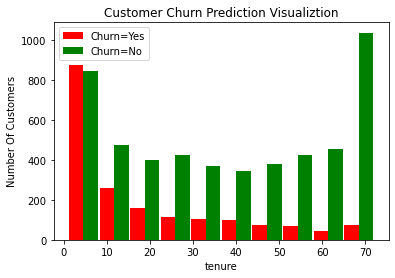

In [56]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

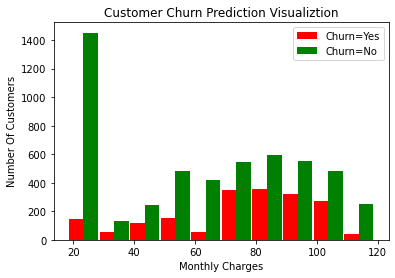

In [59]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

Many of the columns are yes, no etc. Let's print unique values in object columns to see data values

In [188]:
def print_unique_col_values(df1):
       for column in df1:
            if df[column].dtypes=='object':
                print(f'{column}: {df1[column].unique()}') 
                print("---------------------------")

In [189]:
print_unique_col_values(df1)

gender: [1 0]
---------------------------
Partner: [1 0]
---------------------------
Dependents: [0 1]
---------------------------
PhoneService: [0 1]
---------------------------
MultipleLines: [0 1]
---------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
---------------------------
OnlineSecurity: [0 1]
---------------------------
OnlineBackup: [1 0]
---------------------------
DeviceProtection: [0 1]
---------------------------
TechSupport: [0 1]
---------------------------
StreamingTV: [0 1]
---------------------------
StreamingMovies: [0 1]
---------------------------
Contract: ['Month-to-month' 'One year' 'Two year']
---------------------------
PaperlessBilling: [1 0]
---------------------------
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
---------------------------
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
---------------------------
Churn: [0 1]
---------------------------


Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [66]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [190]:
print_unique_col_values(df1)
print("---------------------------")

gender: [1 0]
---------------------------
Partner: [1 0]
---------------------------
Dependents: [0 1]
---------------------------
PhoneService: [0 1]
---------------------------
MultipleLines: [0 1]
---------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
---------------------------
OnlineSecurity: [0 1]
---------------------------
OnlineBackup: [1 0]
---------------------------
DeviceProtection: [0 1]
---------------------------
TechSupport: [0 1]
---------------------------
StreamingTV: [0 1]
---------------------------
StreamingMovies: [0 1]
---------------------------
Contract: ['Month-to-month' 'One year' 'Two year']
---------------------------
PaperlessBilling: [1 0]
---------------------------
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
---------------------------
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
---------------------------
Churn: [0 1]
---------------------------
---

Convert Yes and No to 1 or 0

In [75]:
yes_no_columns = df[df[column].is in (['Yes','No'])]
yes_no_columns

SyntaxError: invalid syntax (Temp/ipykernel_15064/3622516750.py, line 1)

In [76]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [191]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 
    print("---------------------------")

gender: [1 0]
---------------------------
SeniorCitizen: [0 1]
---------------------------
Partner: [1 0]
---------------------------
Dependents: [0 1]
---------------------------
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
---------------------------
PhoneService: [0 1]
---------------------------
MultipleLines: [0 1]
---------------------------
InternetService: ['DSL' 'Fiber optic' 'No']
---------------------------
OnlineSecurity: [0 1]
---------------------------
OnlineBackup: [1 0]
---------------------------
DeviceProtection: [0 1]
---------------------------
TechSupport: [0 1]
---------------------------
StreamingTV: [0 1]
---------------------------
StreamingMovies: [0 1]
---------------------------
Contract: ['Month-to-month' 'One year' 'Two year']
---------------------------
PaperlessBilling: [1 

In [78]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [79]:
df1.gender.unique()

array([1, 0], dtype=int64)

One hot encoding for categorical columns

In [80]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [81]:
df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5155,1,0,0,0,30,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3801,1,1,0,0,18,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [82]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [83]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [84]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

Train test split

In [85]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [86]:

len(X_train.columns)

26

In [90]:
pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=9a850c4e274888b0758136541efe1fa94154ea63186dffa516d27fbd26fc6cdb
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.1
    Uninstalling protobuf-3.20.1:
      Successfully uninstalled protobuf-3.20.1


In [98]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 4s 3ms/step - loss: 0.4763 - accuracy: 0.7676
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.7970
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4195 - accuracy: 0.8002
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8034
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8057
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8057
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8080
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8064
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8094
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4061 - accura

In [99]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7754


[0.4874902665615082, 0.7754086852073669]

In [100]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.48260748],
       [0.46223938],
       [0.0104318 ],
       [0.6439412 ],
       [0.29863262]], dtype=float32)

In [101]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [102]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

Text(69.0, 0.5, 'Truth')

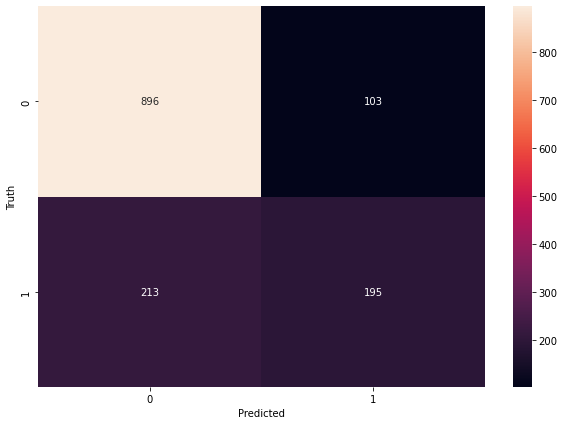

In [107]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [142]:
import seaborn as sn
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[896, 103],
       [213, 195]])>

In [143]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.65      0.48      0.55       408

    accuracy                           0.78      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.76      0.78      0.76      1407



Accuracy

In [183]:
# Accuracy
round((896+195)/(896+195+103+213),2)

0.78

In [184]:
# Precision for 0 class. i.e. Precision for customers who did not churn
round(896/(896+213),2)

0.81

In [185]:
# Precision for 1 class. i.e. Precision for customers who actually churned

round(195/(195+103),2)

0.65

In [186]:
# Recall for 0 class

round(896/(896+103),2)

0.9

In [187]:
round(195/(195+213),2)
0.56

0.56